In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!

/content/drive/MyDrive/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!


In [5]:
#libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv("imdb.csv")

In [20]:
df = data[["IMDB_Rating","Released_Year","Runtime","Meta_score","Gross", "Director"]]

In [22]:
df.head()

,IMDB_Rating,Released_Year,Runtime,Meta_score,Gross,Director
0,9.3,1994,142 min,80.0,"28,341,469",Frank Darabont
1,9.2,1972,175 min,100.0,"134,966,411",Francis Ford Coppola
2,9.0,2008,152 min,84.0,"534,858,444",Christopher Nolan
3,9.0,1974,202 min,90.0,"57,300,000",Francis Ford Coppola
4,9.0,1957,96 min,96.0,"4,360,000",Sidney Lumet


In [30]:
#Look at DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDB_Rating    1000 non-null   float64
 1   Released_Year  999 non-null    float64
 2   Runtime        1000 non-null   object 
 3   Meta_score     843 non-null    float64
 4   Gross          831 non-null    object 
 5   Director       1000 non-null   object 
dtypes: float64(3), object(3)
memory usage: 47.0+ KB


In [29]:
# Convert Released_Year to numeric
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors='coerce')

<ipython-input-29-3cae99fcbc16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors='coerce')


In [31]:
#Check row 966
df.iloc[966]

IMDB_Rating              7.6
Released_Year            NaN
Runtime              140 min
Meta_score              77.0
Gross            173,837,933
Director          Ron Howard
Name: 966, dtype: object

In [35]:
#Create a decade variable
df["Decade"] = np.floor(df["Released_Year"] / 10 ) * 10

<ipython-input-35-5f76dfd35750>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Decade"] = np.floor(df["Released_Year"] / 10 ) * 10


In [36]:
df

,IMDB_Rating,Released_Year,Runtime,Meta_score,Gross,Director,Decade
0,9.3,1994.0,142 min,80.0,"28,341,469",Frank Darabont,1990.0
1,9.2,1972.0,175 min,100.0,"134,966,411",Francis Ford Coppola,1970.0
2,9.0,2008.0,152 min,84.0,"534,858,444",Christopher Nolan,2000.0
3,9.0,1974.0,202 min,90.0,"57,300,000",Francis Ford Coppola,1970.0
4,9.0,1957.0,96 min,96.0,"4,360,000",Sidney Lumet,1950.0
...,...,...,...,...,...,...,...
995,7.6,1961.0,115 min,76.0,NaN,Blake Edwards,1960.0
996,7.6,1956.0,201 min,84.0,NaN,George Stevens,1950.0
997,7.6,1953.0,118 min,85.0,"30,500,000",Fred Zinnemann,1950.0
998,7.6,1944.0,97 min,78.0,NaN,Alfred Hitchcock,1940.0


In [40]:
#Convert and transform runtime
df['Runtime'] = df['Runtime'].str.replace(" min","").astype(int)

AttributeError: Can only use .str accessor with string values!

In [42]:
df.describe()

,IMDB_Rating,Released_Year,Runtime,Meta_score,Decade
count,1000.000000,999.000000,1000.000000,843.000000,999.000000
mean,7.949300,1991.217217,122.891000,77.971530,1986.586587
std,0.275491,23.297025,28.093671,12.376099,23.189130
min,7.600000,1920.000000,45.000000,28.000000,1920.000000
25%,7.700000,1976.000000,103.000000,70.000000,1970.000000
50%,7.900000,1999.000000,119.000000,79.000000,1990.000000
75%,8.100000,2009.000000,137.000000,87.000000,2000.000000
max,9.300000,2020.000000,321.000000,100.000000,2020.000000


In [43]:
#Fill NAN values with zero
df['Gross'] = df["Gross"].fillna(0)
print(df['Gross'].isna().sum())

0


<ipython-input-43-5e792981a1dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df["Gross"].fillna(0)


In [45]:
#Convert and transform the Gross Variable
df['Gross'] = df["Gross"].str.replace(",","").fillna(0).astype(int)


<ipython-input-45-b927cb204589>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df["Gross"].str.replace(",","").fillna(0).astype(int)


In [47]:
#Creating a mil variable for Gross
df['Gross_mil'] = df['Gross'] / 1_000_000

<ipython-input-47-df5513456c90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross_mil'] = df['Gross'] / 1_000_000


In [48]:
df

,IMDB_Rating,Released_Year,Runtime,Meta_score,Gross,Director,Decade,Gross_mil
0,9.3,1994.0,142,80.0,28341469,Frank Darabont,1990.0,28.341469
1,9.2,1972.0,175,100.0,134966411,Francis Ford Coppola,1970.0,134.966411
2,9.0,2008.0,152,84.0,534858444,Christopher Nolan,2000.0,534.858444
3,9.0,1974.0,202,90.0,57300000,Francis Ford Coppola,1970.0,57.300000
4,9.0,1957.0,96,96.0,4360000,Sidney Lumet,1950.0,4.360000
...,...,...,...,...,...,...,...,...
995,7.6,1961.0,115,76.0,0,Blake Edwards,1960.0,0.000000
996,7.6,1956.0,201,84.0,0,George Stevens,1950.0,0.000000
997,7.6,1953.0,118,85.0,30500000,Fred Zinnemann,1950.0,30.500000
998,7.6,1944.0,97,78.0,0,Alfred Hitchcock,1940.0,0.000000


In [50]:
df = df.drop(columns = ['Released_Year','Gross'])
df.head()

,IMDB_Rating,Runtime,Meta_score,Director,Decade,Gross_mil
0,9.3,142,80.0,Frank Darabont,1990.0,28.341469
1,9.2,175,100.0,Francis Ford Coppola,1970.0,134.966411
2,9.0,152,84.0,Christopher Nolan,2000.0,534.858444
3,9.0,202,90.0,Francis Ford Coppola,1970.0,57.300000
4,9.0,96,96.0,Sidney Lumet,1950.0,4.360000


In [51]:
df.describe()

,IMDB_Rating,Runtime,Meta_score,Decade,Gross_mil
count,1000.000000,1000.000000,843.000000,999.000000,1000.000000
mean,7.949300,122.891000,77.971530,1986.586587,56.536878
std,0.275491,28.093671,12.376099,23.189130,103.238179
min,7.600000,45.000000,28.000000,1920.000000,0.000000
25%,7.700000,103.000000,70.000000,1970.000000,0.445710
50%,7.900000,119.000000,79.000000,1990.000000,10.702751
75%,8.100000,137.000000,87.000000,2000.000000,61.539891
max,9.300000,321.000000,100.000000,2020.000000,936.662225


<Axes: >

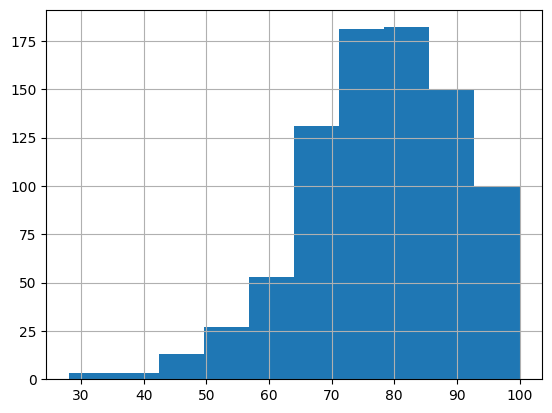

In [52]:
df['Meta_score'].hist()

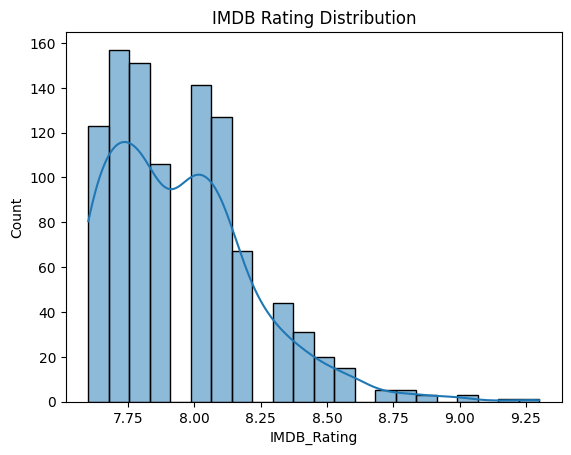

In [54]:
#Histogram of the IMDB ratings
sns.histplot(df['IMDB_Rating'], kde=True)
plt.title("IMDB Rating Distribution")
plt.show()


In [61]:
#Study the top 10 directors with the hightest avg IMDB rating
director_ratings = (df.groupby('Director')['IMDB_Rating'].mean(10).sort_values(ascending=False).head(10))
director_ratings

Director
Frank Darabont        8.95
Irvin Kershner        8.70
Lana Wachowski        8.70
George Lucas          8.60
Roberto Benigni       8.60
Masaki Kobayashi      8.60
Thomas Kail           8.60
Sudha Kongara         8.60
Fernando Meirelles    8.60
Roger Allers          8.50
Name: IMDB_Rating, dtype: float64

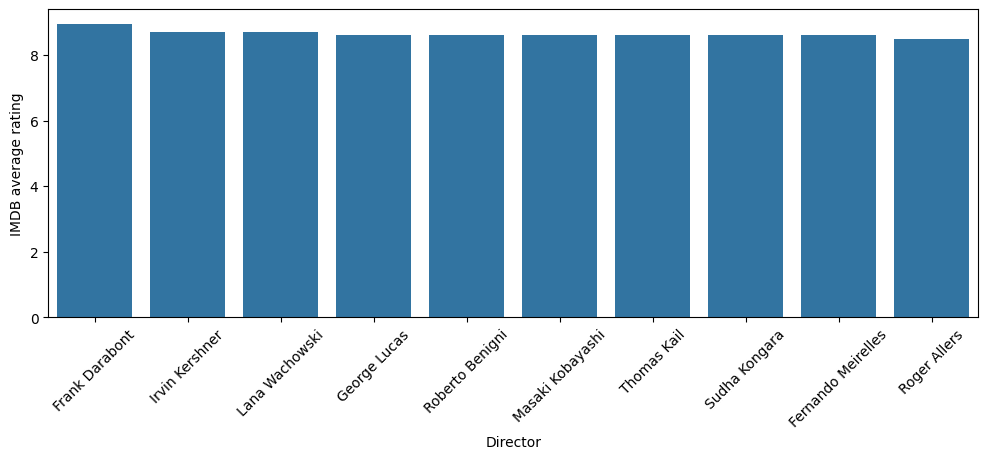

In [69]:
#Visualize the mean IMDB ratings for the top 10 directors
plt.figure(figsize=(12,4))
sns.barplot(x = director_ratings.index, y=director_ratings.values)
plt.xticks(rotation = 45)
plt.xlabel('Director')
plt.ylabel('IMDB average rating')
plt.show()

Text(0.5, 1.0, 'IMDB Rating Distribution by Decade')

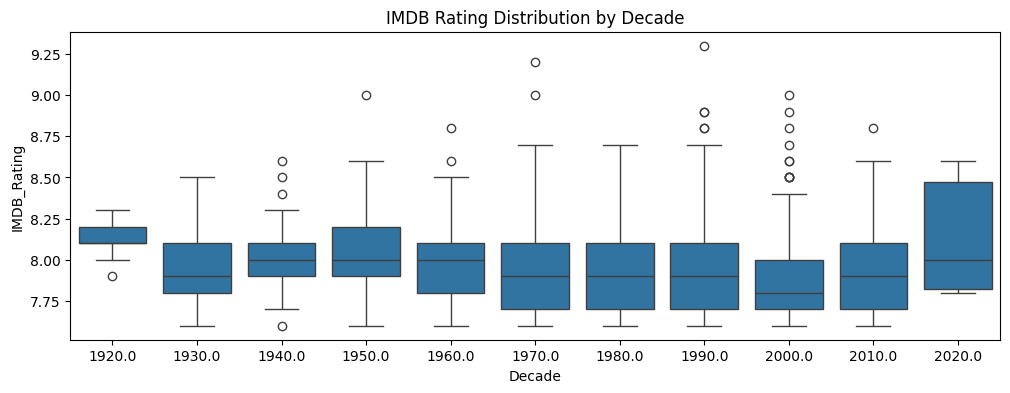

In [73]:
#Distribution of IMDB ratings by decade
plt.figure(figsize=(12,4))
sns.boxplot(x = 'Decade', y='IMDB_Rating', data = df)
plt.title('IMDB Rating Distribution by Decade')

In [77]:
# Covariance Matrix
df_co = df[["Runtime", "IMDB_Rating", "Gross_mil", "Meta_score"]]
df_co.cov()

,Runtime,IMDB_Rating,Gross_mil,Meta_score
Runtime,789.254373,1.881455,417.438934,-10.526302
IMDB_Rating,1.881455,0.075895,2.343023,0.942946
Gross_mil,417.438934,2.343023,10658.121703,-72.676259
Meta_score,-10.526302,0.942946,-72.676259,153.167835


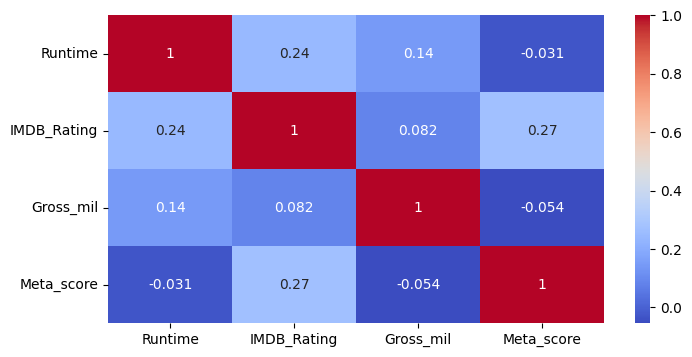

In [78]:
# Correlation heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df_co.corr(), annot = True, cmap='coolwarm')
plt.show()

In [81]:
#Calculate the mean, the standard deviation, the sample size

summary = df.groupby("Decade").agg({"Gross_mil" : ['mean','std','count']})

In [84]:
#Rename the columns
summary.columns=['Gross_mean','Gross_std', "Gross_count"]

In [93]:
#Calculate the SEM
summary['Gross_sem'] = summary['Gross_std'] / np.sqrt(summary['Gross_count'])
summary.head()

,Gross_mean,Gross_std,Gross_count,Gross_sem
Decade,,,,
1920.0,1.341802,2.084388,11,0.628467
1930.0,9.968549,40.300467,24,8.226298
1940.0,4.739121,13.376285,35,2.261005
1950.0,7.846706,17.703398,56,2.365716
1960.0,21.234302,35.304236,73,4.132048


In [97]:
#Calculate the confidence interval with 95%
alpha = 0.05
summary['tscore'] = st.t.ppf((1-alpha) / 2, summary['Gross_count'] - 1)

#Confidence Interval
summary['lower_ci'] = summary['Gross_mean'] - summary['tscore'] * summary['Gross_sem']
summary['upper_ci'] = summary['Gross_mean'] + summary['tscore'] * summary['Gross_sem']

In [98]:
1 - 0.05/2

0.975

In [99]:
#Display the results
summary

,Gross_mean,Gross_std,Gross_count,Gross_sem,tscore,lower_ci,upper_ci
Decade,,,,,,,
1920.0,1.341802,2.084388,11,0.628467,-0.064298,1.382211,1.301393
1930.0,9.968549,40.300467,24,8.226298,-0.063395,10.490053,9.447046
1940.0,4.739121,13.376285,35,2.261005,-0.063171,4.881952,4.596291
1950.0,7.846706,17.703398,56,2.365716,-0.062994,7.995731,7.697681
1960.0,21.234302,35.304236,73,4.132048,-0.062926,21.494314,20.974290
1970.0,41.051211,61.715373,76,7.079239,-0.062917,41.496616,40.605807
1980.0,56.013362,78.126921,89,8.281437,-0.062886,56.534148,55.492577
1990.0,57.147999,92.390192,150,7.543628,-0.062812,57.621833,56.674165
2000.0,63.191930,102.460660,237,6.655535,-0.062774,63.609721,62.774139
